## Apartat C

In [165]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('Financial Distress.csv')
#dataset = dataset.drop(columns=['x80'])
dataset.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


**Company:** Empreses de mostra.<br />
**Time:** Diferents períodes de temps als quals pertanyen les dades. La durada de les sèries temporals varia entre 1 i 14 per a cada empresa.<br />
**Financial Distress:** La variable objectiu es denota per "Financial Distress" si és superior a -0,50 l'empresa s'ha de considerar sana (0). En cas contrari, es consideraria amb dificultats financeres (1).<br />
**x1-x83:** Les característiques indicades per x1 a x83 són algunes de les característiques financeres i no financeres de les empreses mostrejades. Aquestes característiques pertanyen al període de temps anterior, que s'hauria d'utilitzar per predir si l'empresa patirà dificultats financeres o no (classificació). La característica x80 és una variable categòrica.

In [166]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

In [167]:
dataset.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896772,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


<IPython.core.display.Javascript object>


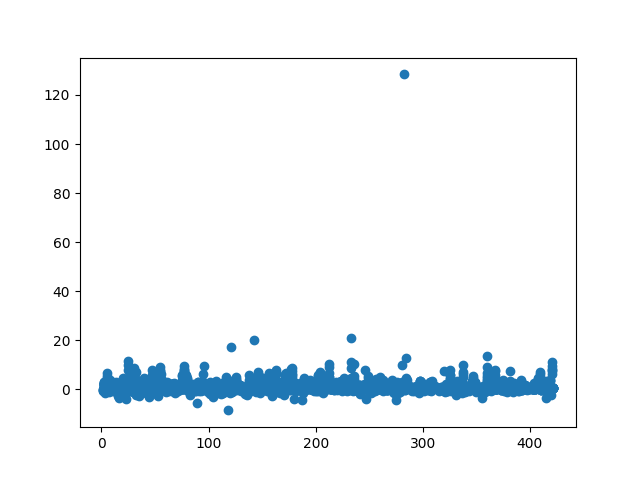

In [168]:
data = dataset.values
x = data[:, :]
x = np.delete(x, 2, 1)
y = data[:, 2]
plt.figure()
ax = plt.scatter(x[:,0], y)

(Hi ha un valor igual a 128 que es massa elevat i poc representatiu, molt probable que es tingui que treure)<br />
Eliminem la fila on es troba aquest valor, i tornem a visualitzar els punts de la mostra pel mateix atribut.

<IPython.core.display.Javascript object>


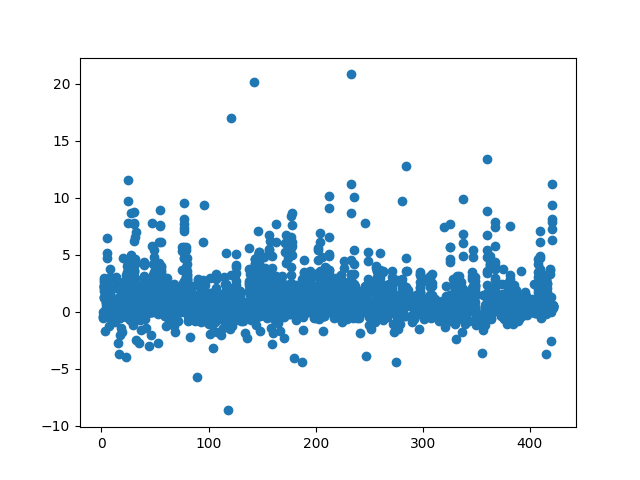

In [169]:
#print(y.max())
aux = np.where(y == y.max())[0]
y = np.delete(y, aux, 0)
x = np.delete(x, aux, 0)
plt.figure()
ax = plt.scatter(x[:,0], y)

Comprovem quins dels atributs tenen una distribució Gaussiana...

<IPython.core.display.Javascript object>


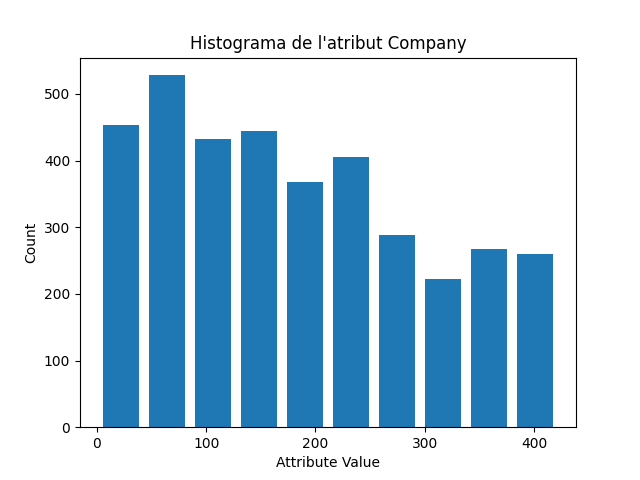

In [170]:
plt.figure()
plt.title("Histograma de l'atribut Company")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,0], bins=10, range=[np.min(x[:,0]), np.max(x[:,0])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


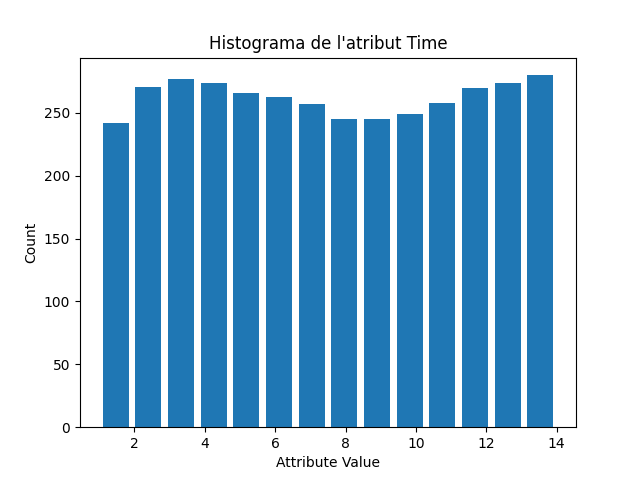

In [171]:
plt.figure()
plt.title("Histograma de l'atribut Time")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,1], bins=14, range=[np.min(x[:,1]), np.max(x[:,1])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


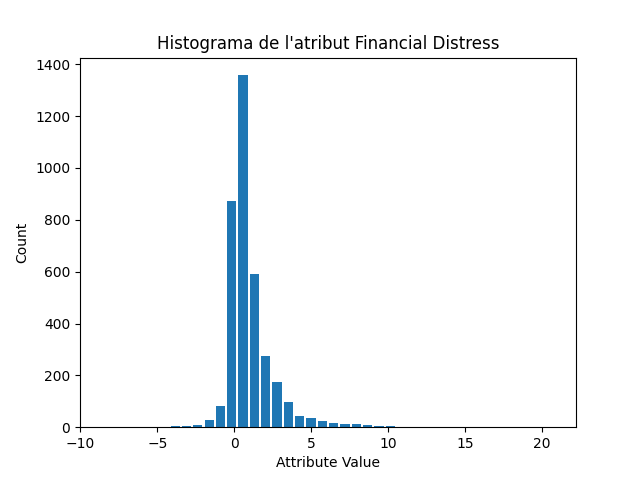

In [172]:
plt.figure()
plt.title("Histograma de l'atribut Financial Distress")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(y, bins=40, range=[np.min(y), np.max(y)], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


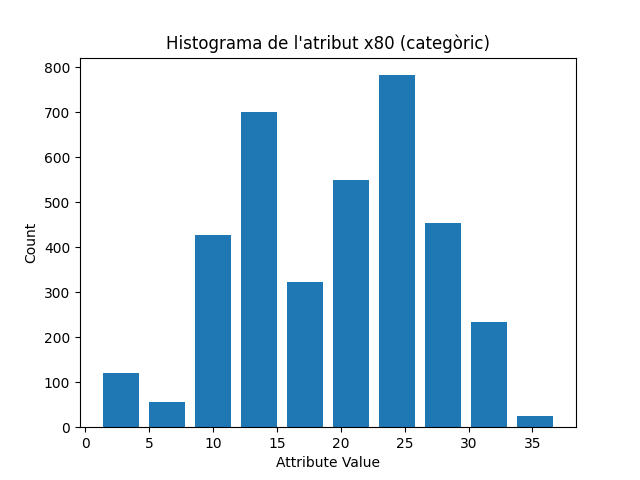

In [173]:
plt.figure()
plt.title("Histograma de l'atribut x80 (categòric)")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,81], bins=10, range=[np.min(x[:,81]), np.max(x[:,81])], histtype="bar", rwidth=0.8)

Apliquem PCA als atributs x1-x83. Abans estandaritzem els valors (mitjana = 0, desviació estàndard = 1).<br />
Com a resultat inserim els nous atributs en substitució als originals (el valor n_components pot variar en funció de la qualitat final del model).

In [174]:
from sklearn.decomposition import PCA

def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

components = 2

aux_x = x[:,2:]
#aux_x = np.delete(aux_x, 79, 1)
aux_x = standarize(aux_x)
pca = PCA(n_components=components)
aux_pca = pca.fit_transform(aux_x)
x = np.concatenate((x[:,0:2], aux_pca), axis=1)
print(x)

[[  1.           1.          -5.62144455   1.28223496]
 [  1.           2.          -4.43955942  -0.64838524]
 [  1.           3.          -6.65492492  -3.37558161]
 ...
 [422.          12.           7.30394433  -1.07767634]
 [422.          13.           5.45641007  -1.04277919]
 [422.          14.           5.7782078   -1.97584383]]


In [175]:
x_labels = ['Company', 'Time']
for i in range(2, x.shape[1]):
    x_labels.append('x' + str(i-1))
x_labels.append('Financial Distress')
#print(x[:,:2])
#print(y[np.newaxis].T)
new_dataset = pd.DataFrame(np.append(x, y[np.newaxis].T, axis=1), columns = x_labels)
new_dataset

,Company,Time,x1,x2,Financial Distress
0,1.0,1.0,-5.621445,1.282235,0.010636
1,1.0,2.0,-4.439559,-0.648385,-0.455970
2,1.0,3.0,-6.654925,-3.375582,-0.325390
3,1.0,4.0,-4.676599,-0.724324,-0.566570
4,2.0,1.0,-3.627412,3.268209,1.357300
...,...,...,...,...,...
3666,422.0,10.0,6.075672,1.619333,0.438020
3667,422.0,11.0,8.277334,-1.708287,0.482410
3668,422.0,12.0,7.303944,-1.077676,0.500770
3669,422.0,13.0,5.456410,-1.042779,0.611030


<IPython.core.display.Javascript object>


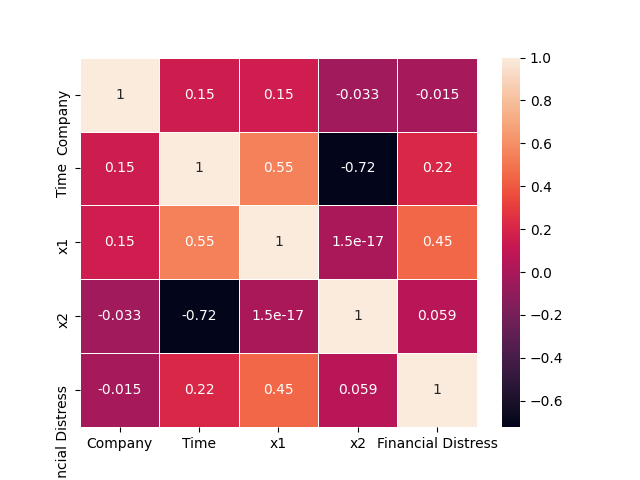

In [176]:
import seaborn as sns

correlacio = new_dataset.corr()
plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


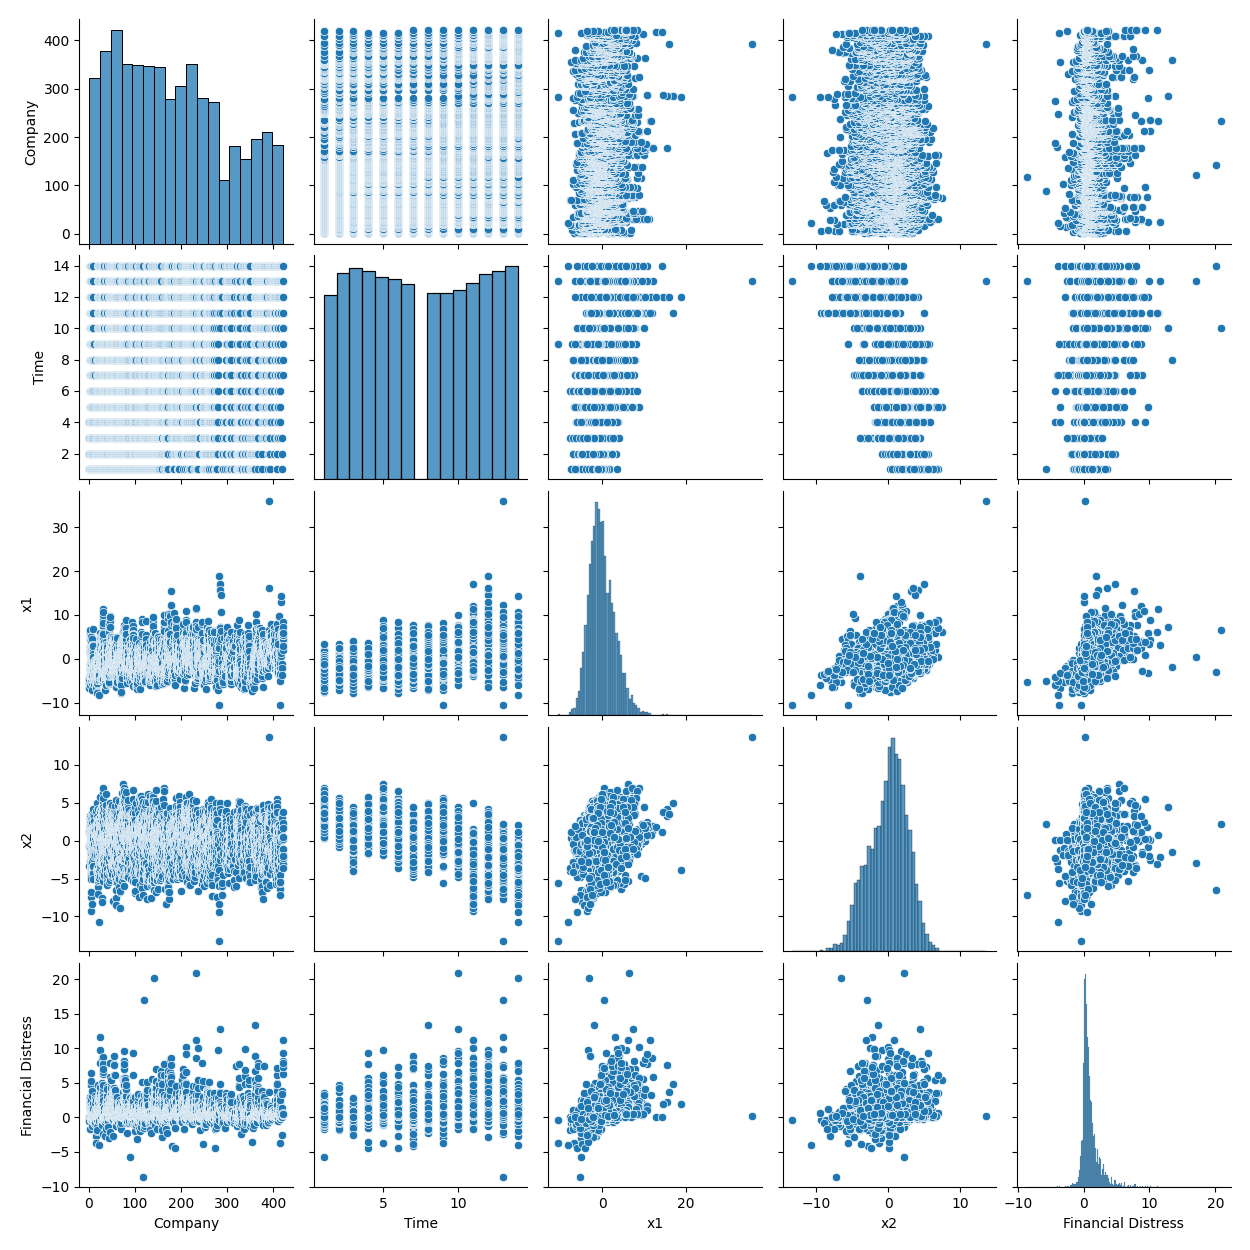

In [177]:
relacio = sns.pairplot(new_dataset)

**1. Quin és el tipus de cada atribut?**<br />
En total hi han 86 atributs diferents, dels quals 5 son int64 (Company, Time, x80, x82, x83). La resta són float64.<br />
**2. Quins atributs tenen una distribució Gaussiana?**<br />
L'atribut Financial Distress.<br />
**3. Quin és l'atribut objectiu? Per què?**<br />
(TBD)<br />

## Apartat B

(Provar regressor lineal per atributs diferents)

<IPython.core.display.Javascript object>


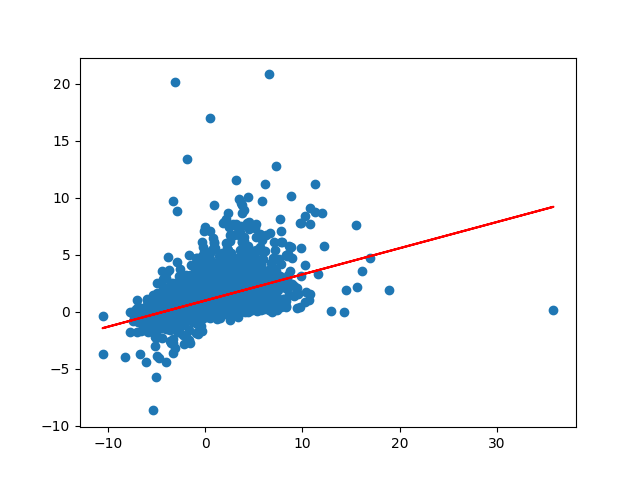

Mean squeared error:  2.0757826922091693
R2 score:  0.20606600584838342
[[  1.           1.          -5.62144455   1.28223496]
 [  1.           2.          -4.43955942  -0.64838524]
 [  1.           3.          -6.65492492  -3.37558161]
 ...
 [422.          12.           7.30394433  -1.07767634]
 [422.          13.           5.45641007  -1.04277919]
 [422.          14.           5.7782078   -1.97584383]]


In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def regression(x, y):
    regr = LinearRegression()
    regr.fit(x, y)
    return regr

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

n_attribute = 2

attribute = new_dataset.values[:,n_attribute].reshape(new_dataset.values.shape[0], 1)
y = new_dataset.values[:,-1].reshape(new_dataset.values.shape[0], 1)
regr = regression(attribute, y) 
predicted = regr.predict(attribute)

plt.figure()
ax = plt.scatter(new_dataset.values[:,n_attribute], y)
plt.plot(attribute[:,0], predicted, 'r')

MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)
print(new_dataset.values[:,:-1])

In [179]:
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

#print(x[:,2:], y)
x_train, y_train, x_val, y_val = split_data(x[:,2:], y)
mses, r2s = [], []

for i in range(x_train.shape[1]):
    x_t = x_train[:,i]
    x_v = x_val[:,i]
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v))
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut x%d: %f" %(i+1, error))
    print("R2 score en atribut x%d: %f" %(i+1, r2))

Error en atribut x1: 2.340327
R2 score en atribut x1: 0.191384
Error en atribut x2: 2.909248
R2 score en atribut x2: -0.005186


**1. Quin són els atributs més importants per fer una bona predicció?**<br />
L'atribut x1.<br />
**2. Amb quin atribut s'assoleix un MSE menor?**<br />
L'atribut x1.<br />
**3. Quina correlació hi ha entre els atributs de la vostra base de dades?**<br />
(TBD)<br />
**4. Com influeix la normalització en la regressió?**<br />
(TBD)<br />
**5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?**<br />
(TBD)<br />
**6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?**<br />
(TBD)<br />